In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Stations

In [2]:
cologne = Point(50.9375, 6.9603, 53)

In [3]:
cologne.get_stations()

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance,score
id,,,,,,,,,,,,,,,,,
D2968,Köln-Stammheim,DE,NW,<NA>,<NA>,50.9894,6.9777,43.0,Europe/Berlin,1951-01-01,2022-09-08,1945-01-01,2022-09-08,1945-01-01,2022-01-01,5898.264867,0.887458
10513,Köln-Bonn Airport,DE,NW,10513,EDDK,50.8667,7.1667,91.0,Europe/Berlin,1931-01-01,2022-09-10,1931-01-01,2022-09-08,1931-01-01,2022-01-01,16476.260952,0.674121
D1024,Dormagen-Zons,DE,NW,<NA>,<NA>,51.1157,6.8510,37.0,Europe/Berlin,2006-08-01,2022-09-08,2006-08-02,2022-04-25,2006-01-01,2022-01-01,21238.269087,0.617630
10505,Bonn-Hangelar,DE,NRW,10505,<NA>,50.7667,7.1667,60.0,Europe/Berlin,2018-01-27,2022-09-10,2011-04-01,2022-04-24,2011-01-01,2022-01-01,23888.035821,0.582491


# Cologne Stammheim

In [4]:
stations = Stations()
stations = stations.nearby(50.9894, 6.977)
station_stammheim = stations.fetch(1)

In [5]:
station_stammheim

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
D2968,Köln-Stammheim,DE,NW,<NA>,<NA>,50.9894,6.9777,43.0,Europe/Berlin,1951-01-01,2022-09-08,1945-01-01,2022-09-08,1945-01-01,2022-01-01,48.995254


# Cologne Airport

In [6]:
stations = Stations()
stations = stations.nearby(50.8667, 7.1667)
station_airport = stations.fetch(1)

In [7]:
station_airport

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end,distance
id,,,,,,,,,,,,,,,,
10513,Köln-Bonn Airport,DE,NW,10513,EDDK,50.8667,7.1667,91.0,Europe/Berlin,1931-01-01,2022-09-10,1931-01-01,2022-09-08,1931-01-01,2022-01-01,0.0


In [8]:
start = datetime(2022, 9, 1)
end = datetime(2022, 9, 11)
data_airport = Daily(station_airport, start, end)
data_airport = data_airport.fetch()
data_stammheim = Daily(station_stammheim, start, end)
data_stammheim = data_stammheim.fetch()

<AxesSubplot:xlabel='time'>

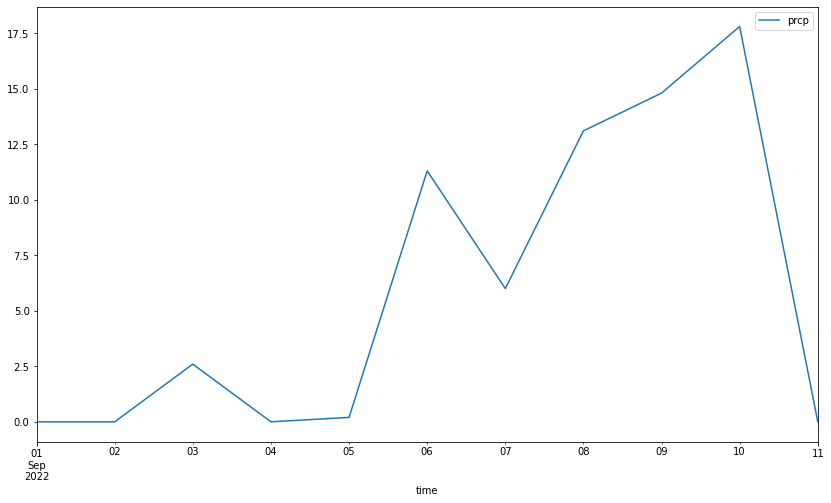

In [9]:
data_airport.plot(y=['prcp'], figsize=(14,8))

<AxesSubplot:xlabel='time'>

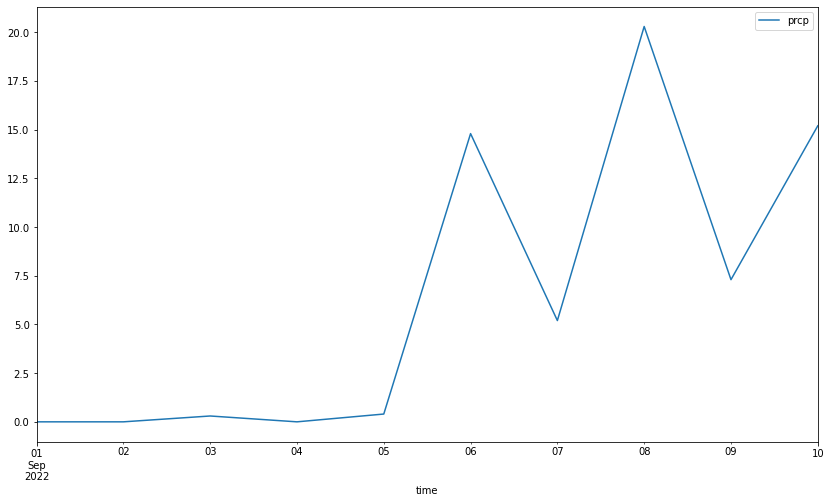

In [10]:
data_stammheim.plot(y=['prcp'], figsize=(14,8))

# Daily Data December 2021 - February 2022

In [9]:
start = datetime(2021, 12, 15)
end = datetime(2022, 2, 21)
data_airport = Daily(station_airport, start, end)
data_airport = data_airport.fetch()
data_stammheim = Daily(station_stammheim, start, end)
data_stammheim = data_stammheim.fetch()

In [10]:
data_airport.head(10)

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2021-12-15,8.4,7.4,9.8,0.1,0.0,177.0,5.4,16.6,1031.3,2.0
2021-12-16,8.4,6.0,9.9,0.0,0.0,118.0,4.0,14.8,1036.6,0.0
2021-12-17,7.0,0.7,8.5,0.0,0.0,110.0,4.3,14.8,1039.0,0.0
2021-12-18,3.6,-0.1,5.6,0.4,0.0,181.0,4.7,16.6,1038.1,0.0
2021-12-19,5.7,5.3,6.2,0.1,0.0,292.0,10.8,29.5,1030.5,0.0
2021-12-20,3.2,-3.9,6.8,0.0,0.0,42.0,9.0,20.5,1026.8,346.0
2021-12-21,-2.3,-7.6,3.6,0.0,0.0,116.0,6.5,13.0,1026.1,389.0
2021-12-22,-1.3,-6.2,2.0,0.0,0.0,118.0,13.7,31.3,1023.9,315.0
2021-12-23,2.2,-1.3,7.2,0.7,0.0,126.0,15.5,36.4,1011.3,2.0


In [11]:
data_stammheim.head(20)

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2021-12-15,9.1,8.3,10.2,0.0,NaN,213.0,6.6,NaN,1031.8,NaN
2021-12-16,8.9,7.9,9.7,0.0,NaN,299.0,5.0,NaN,1037.3,NaN
2021-12-17,8.1,3.2,9.6,0.1,NaN,23.0,4.2,NaN,1040.1,NaN
2021-12-18,5.2,3.0,6.5,0.3,NaN,280.0,4.9,NaN,1039.0,NaN
2021-12-19,6.2,5.9,6.8,0.2,NaN,295.0,12.8,NaN,1031.8,NaN
2021-12-20,4.5,-1.6,7.3,0.0,NaN,40.0,7.4,NaN,1027.9,NaN
2021-12-21,-1.0,-3.9,3.7,0.0,NaN,106.0,5.6,NaN,1027.1,NaN
2021-12-22,-0.5,-3.1,2.4,0.0,NaN,129.0,13.3,NaN,1025.1,NaN
2021-12-23,2.7,-0.4,9.3,2.5,NaN,157.0,11.6,NaN,1012.9,NaN


<AxesSubplot:xlabel='time'>

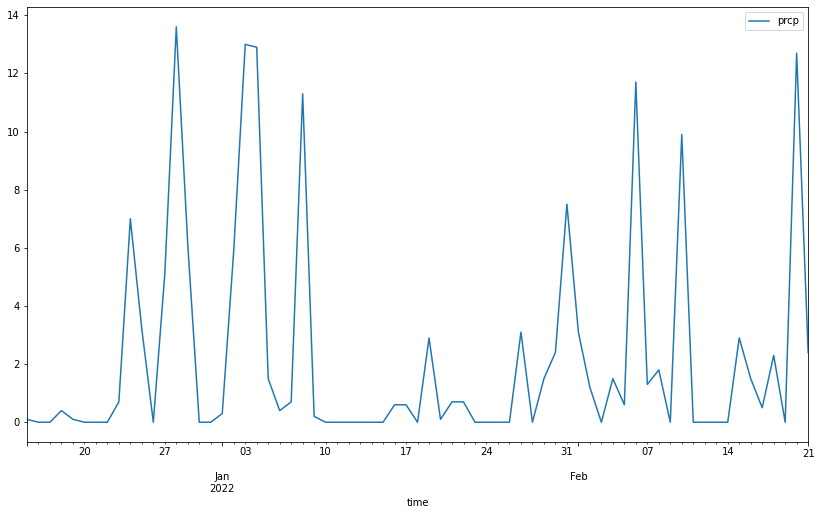

In [12]:
data_airport.plot(y=['prcp'], figsize=(14,8))

<AxesSubplot:xlabel='time'>

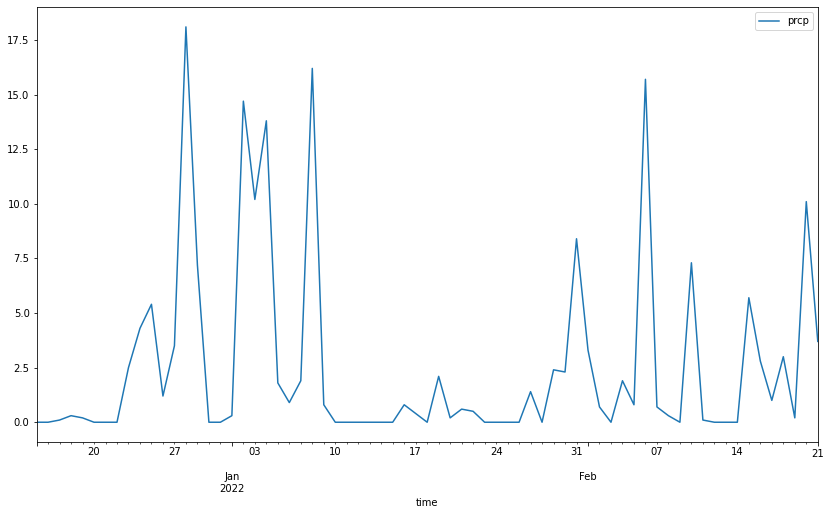

In [13]:
data_stammheim.plot(y=['prcp'], figsize=(14,8))

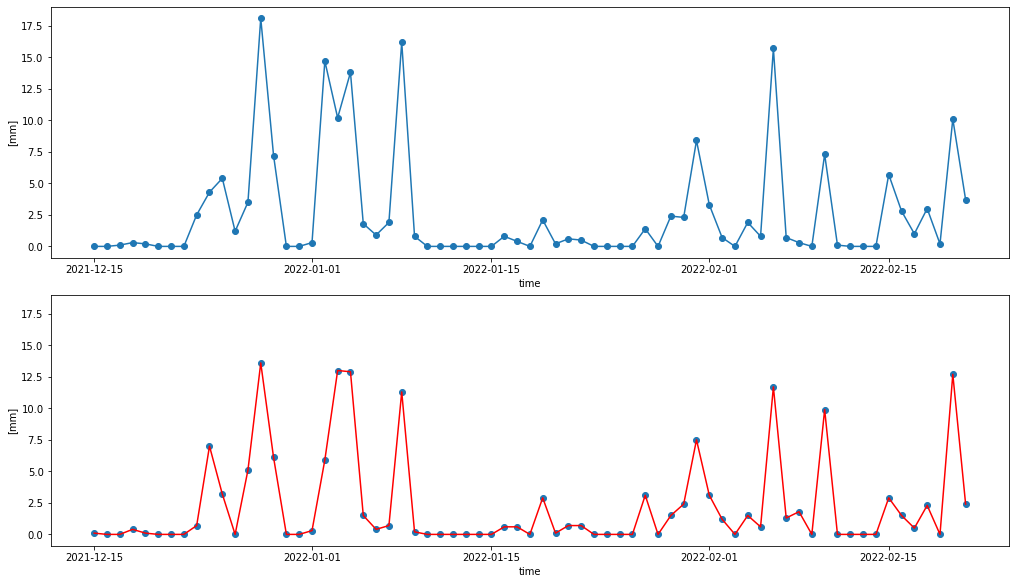

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, sharey=True, figsize=(14, 8))
ax1.scatter(data_stammheim.index, data_stammheim['prcp'])
ax1.plot(data_stammheim.index, data_stammheim['prcp'])
ax1.set_xlabel('time')
ax1.set_ylabel('[mm]')

ax2.scatter(data_airport.index, data_airport['prcp'])
ax2.plot(data_airport.index, data_airport['prcp'], color='r')
ax2.set_xlabel('time')
ax2.set_ylabel('[mm]')
plt.show()

# June - July 2021

In [15]:
start = datetime(2021, 6, 1)
end = datetime(2021, 7, 31)

In [16]:
data_airport = Daily(station_airport, start, end)
data_airport = data_airport.fetch()
data_stammheim = Daily(station_stammheim, start, end)
data_stammheim = data_stammheim.fetch()

<AxesSubplot:xlabel='time'>

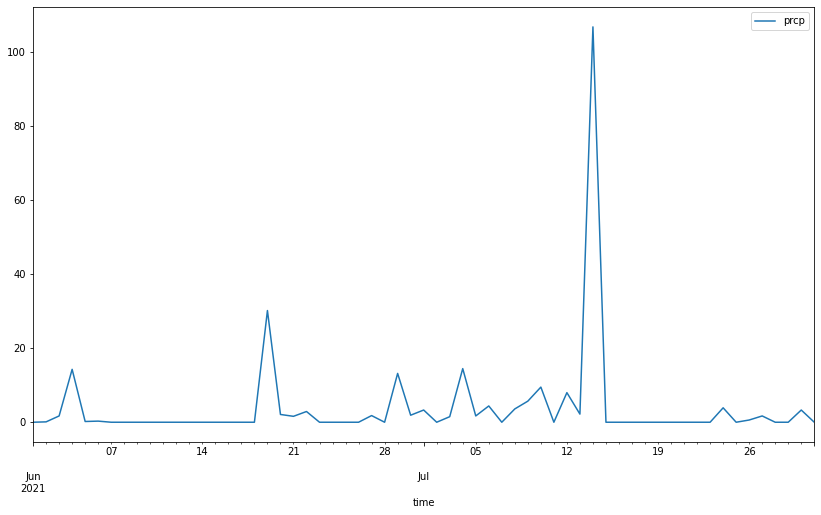

In [17]:
data_airport.plot(y=['prcp'], figsize=(14,8))

<AxesSubplot:xlabel='time'>

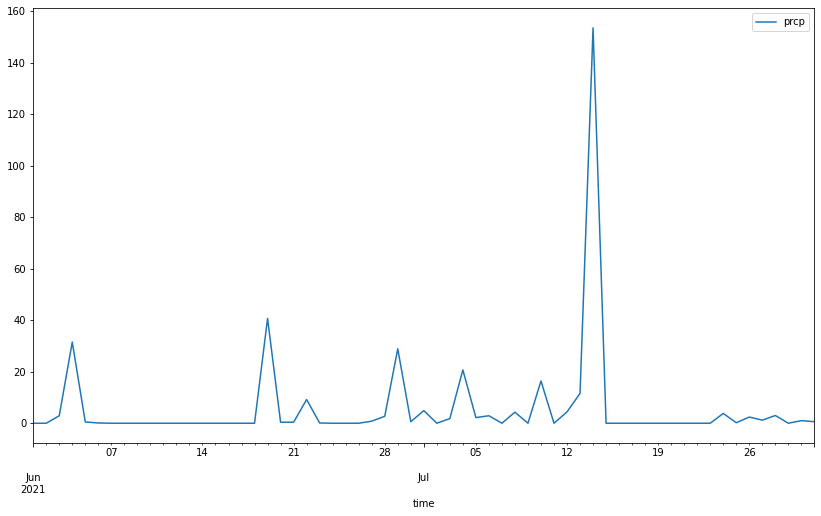

In [18]:
data_stammheim.plot(y=['prcp'], figsize=(14,8))

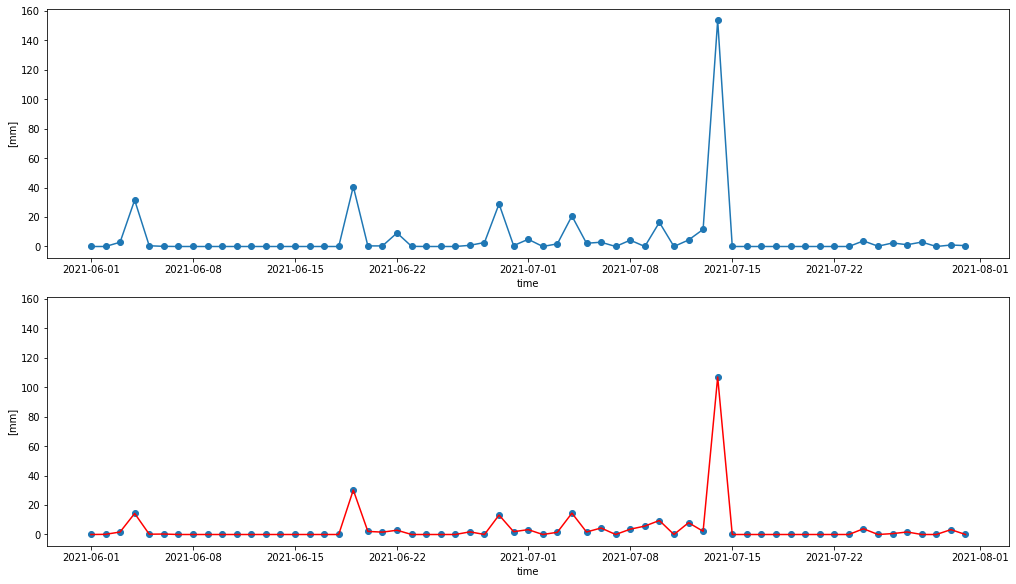

In [19]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, sharey=True, figsize=(14, 8))
ax1.scatter(data_stammheim.index, data_stammheim['prcp'])
ax1.plot(data_stammheim.index, data_stammheim['prcp'])
ax1.set_xlabel('time')
ax1.set_ylabel('[mm]')

ax2.scatter(data_airport.index, data_airport['prcp'])
ax2.plot(data_airport.index, data_airport['prcp'], color='r')
ax2.set_xlabel('time')
ax2.set_ylabel('[mm]')
plt.show()

# June 2021

In [20]:
start = datetime(2021, 2, 1)
end = datetime(2021, 6, 5)
data_airport = Daily(station_airport, start, end)
data_airport = data_airport.fetch()
data_stammheim = Daily(station_stammheim, start, end)
data_stammheim = data_stammheim.fetch()

<AxesSubplot:xlabel='time'>

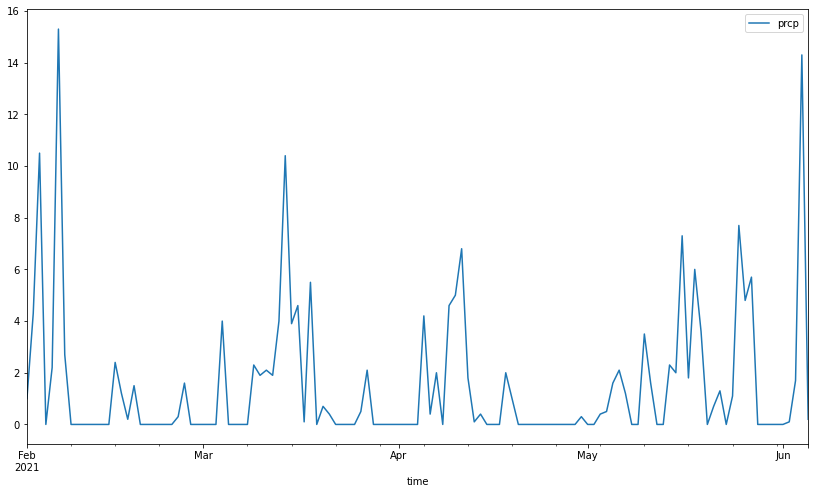

In [21]:
data_airport.plot(y=['prcp'], figsize=(14,8))

<AxesSubplot:xlabel='time'>

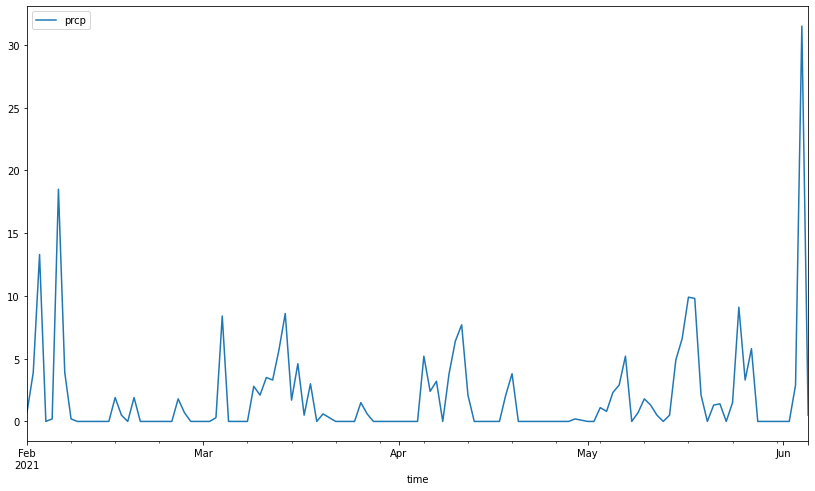

In [22]:
data_stammheim.plot(y=['prcp'], figsize=(14,8))

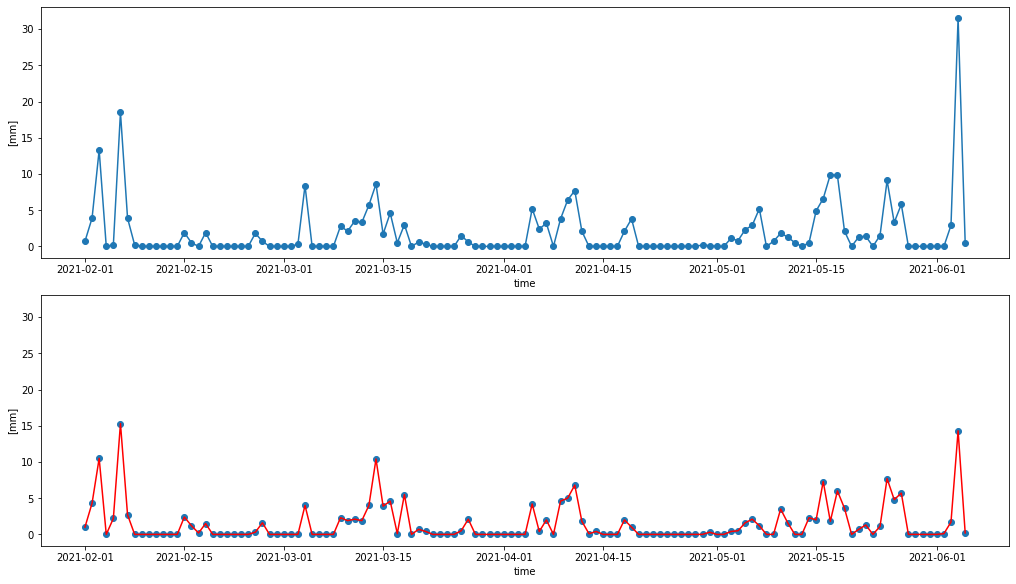

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, sharey=True, figsize=(14, 8))
ax1.scatter(data_stammheim.index, data_stammheim['prcp'])
ax1.plot(data_stammheim.index, data_stammheim['prcp'])
ax1.set_xlabel('time')
ax1.set_ylabel('[mm]')

ax2.scatter(data_airport.index, data_airport['prcp'])
ax2.plot(data_airport.index, data_airport['prcp'], color='r')
ax2.set_xlabel('time')
ax2.set_ylabel('[mm]')
plt.show()

# February 2020

In [24]:
start = datetime(2020, 1, 1)
end = datetime(2020, 2, 28)

In [25]:
data_airport = Daily(station_airport, start, end)
data_airport = data_airport.fetch()
data_stammheim = Daily(station_stammheim, start, end)
data_stammheim = data_stammheim.fetch()

<AxesSubplot:xlabel='time'>

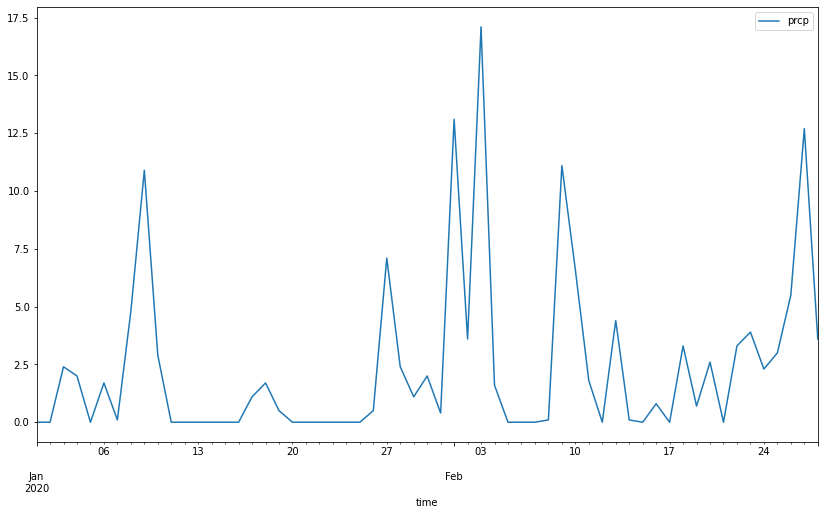

In [26]:
data_airport.plot(y=['prcp'], figsize=(14,8))

<AxesSubplot:xlabel='time'>

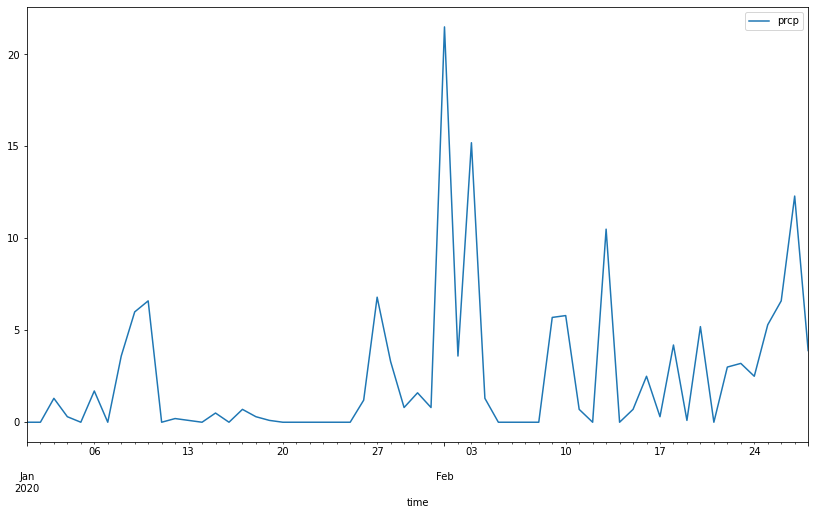

In [27]:
data_stammheim.plot(y=['prcp'], figsize=(14,8))

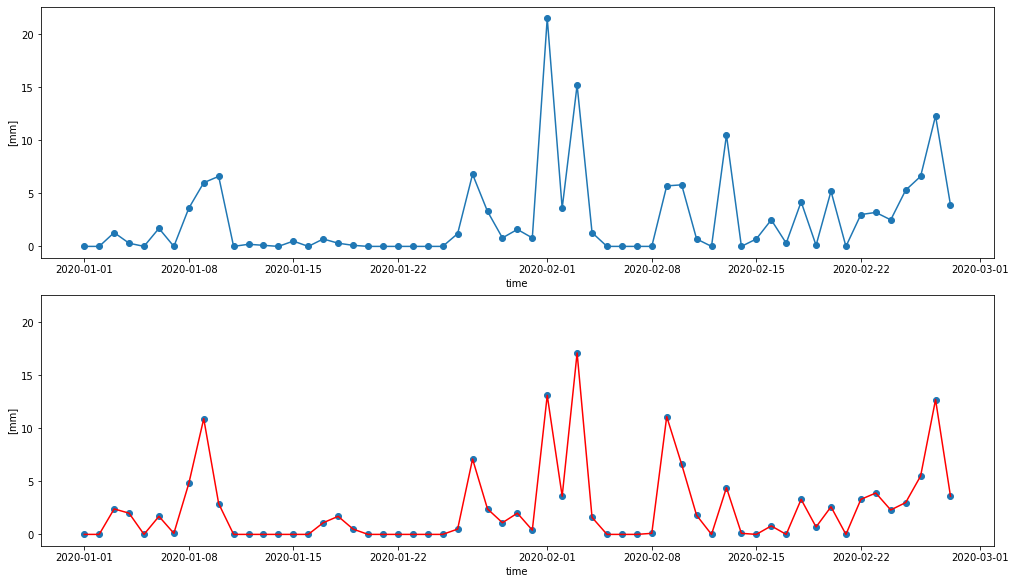

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, sharey=True, figsize=(14, 8))
ax1.scatter(data_stammheim.index, data_stammheim['prcp'])
ax1.plot(data_stammheim.index, data_stammheim['prcp'])
ax1.set_xlabel('time')
ax1.set_ylabel('[mm]')

ax2.scatter(data_airport.index, data_airport['prcp'])
ax2.plot(data_airport.index, data_airport['prcp'], color='r')
ax2.set_xlabel('time')
ax2.set_ylabel('[mm]')
plt.show()

# September - October 2018

In [29]:
start = datetime(2018, 8, 1)
end = datetime(2018, 10, 28)

In [30]:
data_airport = Daily(station_airport, start, end)
data_airport = data_airport.fetch()
data_stammheim = Daily(station_stammheim, start, end)
data_stammheim = data_stammheim.fetch()

<AxesSubplot:xlabel='time'>

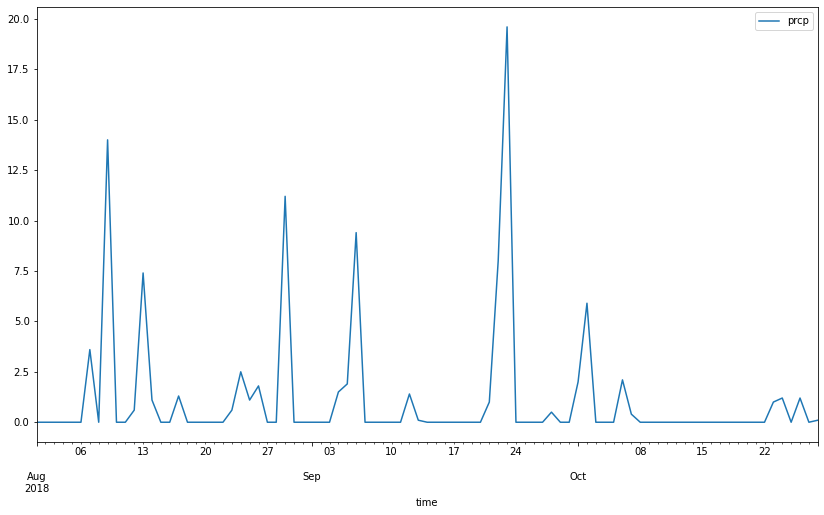

In [31]:
data_airport.plot(y=['prcp'], figsize=(14,8))

<AxesSubplot:xlabel='time'>

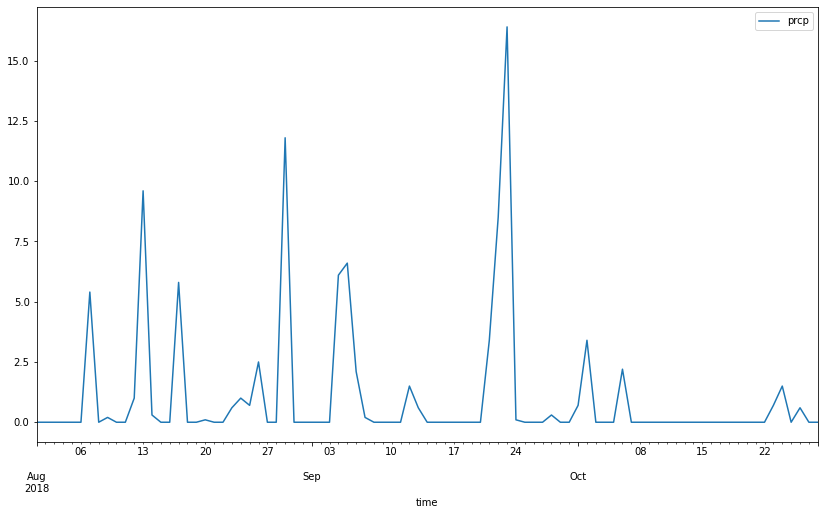

In [32]:
data_stammheim.plot(y=['prcp'], figsize=(14,8))

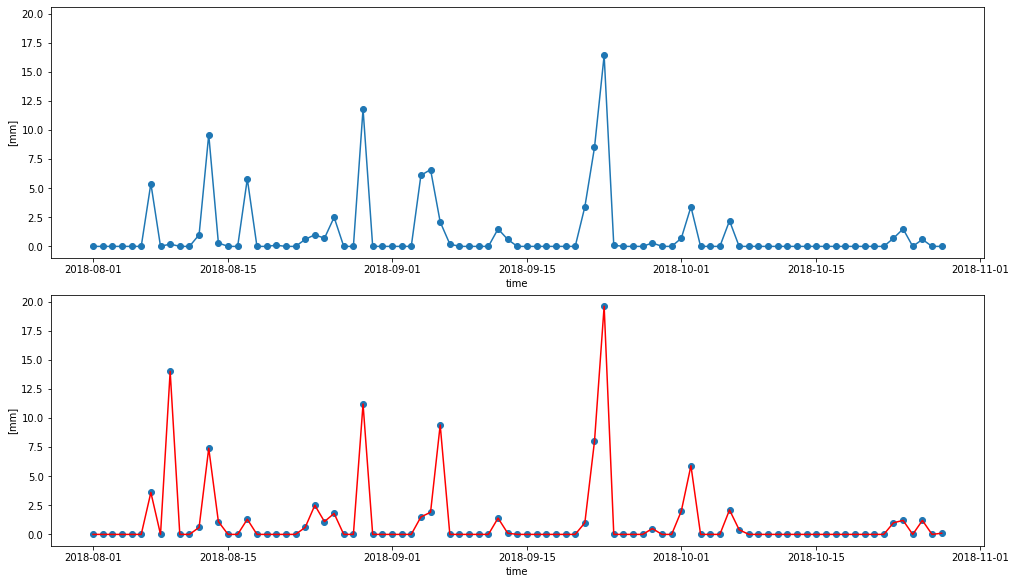

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True, sharey=True, figsize=(14, 8))
ax1.scatter(data_stammheim.index, data_stammheim['prcp'])
ax1.plot(data_stammheim.index, data_stammheim['prcp'])
ax1.set_xlabel('time')
ax1.set_ylabel('[mm]')

ax2.scatter(data_airport.index, data_airport['prcp'])
ax2.plot(data_airport.index, data_airport['prcp'], color='r')
ax2.set_xlabel('time')
ax2.set_ylabel('[mm]')
plt.show()